In [1]:
library(Seurat)
library(ggplot2)
library(Matrix)
library(DoubletFinder)
library(dplyr) # for functions

library(cowplot)
library(ggplot2)
library(dplyr)
library(EnhancedVolcano)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggrepel



In [2]:
seurat <- readRDS(file ="~/data/retina/h5ad/2_09_24_FIG1_embed.rds")

In [3]:
seurat

An object of class Seurat 
32285 features across 16227 samples within 1 assay 
Active assay: RNA (32285 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

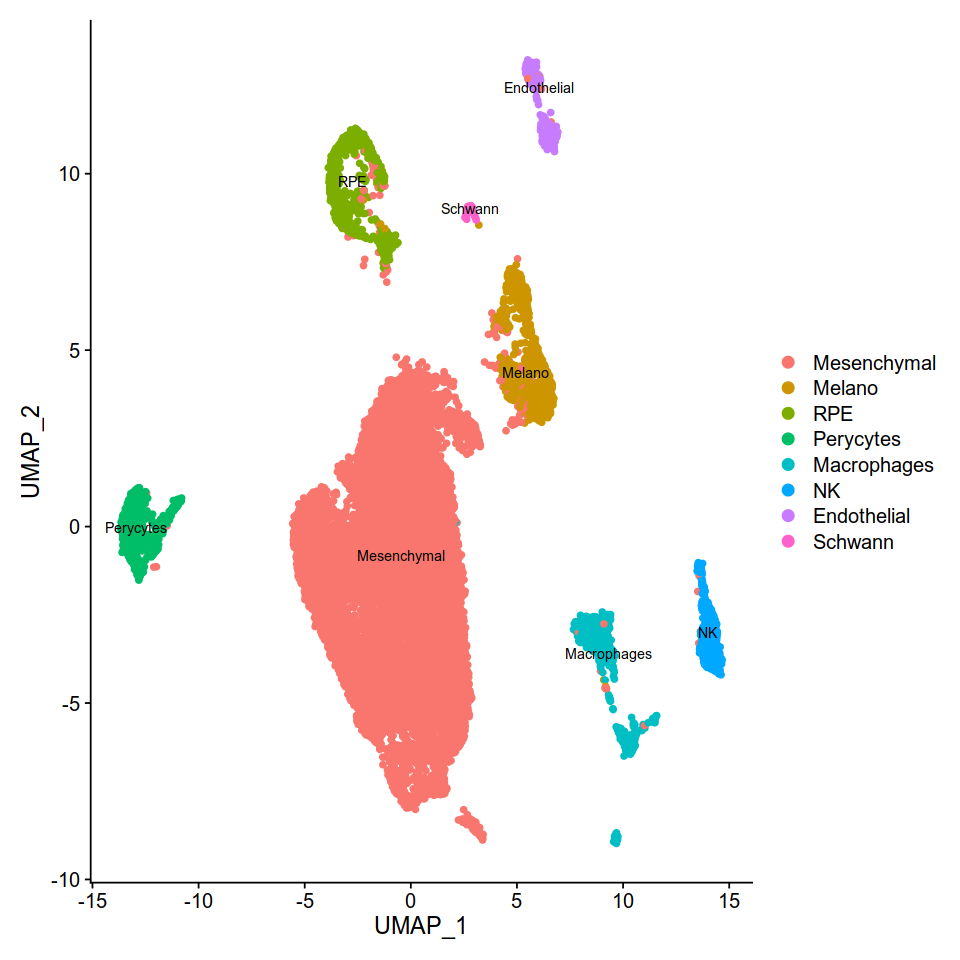

In [4]:
options(repr.plot.width = 8, repr.plot.height =8)
DimPlot(seurat, reduction = "umap", label = TRUE, pt.size = 1.5, label.size = 3)

In [5]:
# Check current cluster identities
Idents(seurat)

AAACCTGAGCAAATCA-1 AAACCTGAGCTAAACA-1 AAACCTGAGCTCCTCT-1 AAACCTGAGGTAAACT-1 
            Melano          Perycytes        Mesenchymal        Mesenchymal 
AAACCTGAGTCTCCTC-1 AAACCTGCACGAAGCA-1 AAACCTGCAGACACTT-1 AAACCTGCAGGATTGG-1 
       Mesenchymal        Mesenchymal             Melano        Mesenchymal 
AAACCTGCAGTATCTG-1 AAACCTGCATCCCATC-1 AAACCTGCATCGATTG-1 AAACCTGCATTAGCCA-1 
                NK        Mesenchymal        Mesenchymal        Mesenchymal 
AAACCTGGTAGCGCAA-1 AAACCTGGTATATGGA-1 AAACCTGGTCGAAAGC-1 AAACCTGGTGGTTTCA-1 
       Mesenchymal          Perycytes        Mesenchymal        Mesenchymal 
AAACCTGGTTACCGAT-1 AAACCTGGTTCACCTC-1 AAACCTGGTTCACGGC-1 AAACCTGGTTCGGGCT-1 
       Mesenchymal        Mesenchymal        Macrophages        Mesenchymal 
AAACCTGTCAACGAAA-1 AAACCTGTCAAGATCC-1 AAACCTGTCAATAAGG-1 AAACCTGTCCAACCAA-1 
       Mesenchymal        Mesenchymal        Macrophages                 NK 
AAACCTGTCGTATCAG-1 AAACCTGTCGTTGACA-1 AAACCTGTCTGATTCT-1 AAACCTGTCTGCAGTA-1 
       Mesenchymal        Mesenchymal        Mesenchymal        Mesenchymal 
AAACCTGTCTTGACGA-1 AAACCTGTCTTGCAAG-1 AAACGGGAGCCAGTAG-1 AAACGGGAGCGATCCC-1 
       Mesenchymal        Mesenchymal        Mesenchymal        Mesenchymal 
AAACGGGAGGCAATTA-1 AAACGGGAGGCAGGTT-1 AAACGGGAGGCTAGGT-1 AAACGGGAGTTCCACA-1 
                NK        Mesenchymal        Mesenchymal        Mesenchymal 
AAACGGGCAAACGCGA-1 AAACGGGCAAATTGCC-1 AAACGGGCAATGGTCT-1 AAACGGGCAGACAAAT-1 
       Mesenchymal        Mesenchymal        Endothelial        Macrophages 
AAACGGGCAGACTCGC-1 AAACGGGCAGTGGGAT-1 AAACGGGCATCTATGG-1 AAACGGGCATTCTTAC-1 
       Mesenchymal        Mesenchymal        Mesenchymal        Mesenchymal 
AAACGGGGTAGCGTCC-1 AAACGGGGTCAGAGGT-1 AAACGGGGTCCGACGT-1 AAACGGGGTCTGATTG-1 
       Mesenchymal        Mesenchymal        Macrophages        Mesenchymal 
AAACGGGGTGATAAGT-1 AAACGGGGTGCCTTGG-1 AAACGGGGTGTAACGG-1 AAACGGGGTTAGAACA-1 
       Mesenchymal             Melano        Mesenchymal        Mesenchymal 
AAACGGGTCACGGTTA-1 AAACGGGTCAGCTGGC-1 AAACGGGTCAGGCCCA-1 AAACGGGTCCATTCTA-1 
       Mesenchymal             Melano             Melano        Mesenchymal 
AAACGGGTCCGTTGTC-1 AAACGGGTCCTCGCAT-1 AAACGGGTCTCTTGAT-1 AAACGGGTCTGCCCTA-1 
               RPE        Mesenchymal          Perycytes        Mesenchymal 
AAACGGGTCTTGACGA-1 AAAGATGAGATCCTGT-1 AAAGATGAGCTACCGC-1 AAAGATGAGGACAGCT-1 
            Melano             Melano             Melano        Mesenchymal 
AAAGATGAGGTGATAT-1 AAAGATGAGTAAGTAC-1 AAAGATGAGTACGATA-1 AAAGATGAGTGTACCT-1 
       Macrophages        Mesenchymal        Macrophages        Mesenchymal 
AAAGATGCAAAGTCAA-1 AAAGATGCAACGATGG-1 AAAGATGCAATAGAGT-1 AAAGATGCAATGGAAT-1 
       Mesenchymal             Melano        Mesenchymal        Mesenchymal 
AAAGATGCACCAGGTC-1 AAAGATGCACGCTTTC-1 AAAGATGCAGCTCGAC-1 AAAGATGCAGCTGTGC-1 
       Endothelial        Mesenchymal        Mesenchymal             Melano 
AAAGATGCAGGATCGA-1 AAAGATGCAGGGTTAG-1 AAAGATGCATGGTCTA-1 AAAGATGGTACACCGC-1 
       Mesenchymal             Melano        Mesenchymal          Perycytes 
AAAGATGGTACGAAAT-1 AAAGATGGTACTCGCG-1 AAAGATGGTAGATTAG-1 AAAGATGGTCACCTAA-1 
       Mesenchymal        Mesenchymal          Perycytes          Perycytes 
AAAGATGGTCCTCTTG-1 AAAGATGGTCGCTTCT-1 AAAGATGGTCTTCAAG-1 AAAGATGGTGACTCAT-1 
       Mesenchymal        Mesenchymal                RPE                RPE 
AAAGATGGTGATAAGT-1 AAAGATGGTGTCAATC-1 AAAGATGGTTAAAGTG-1 AAAGATGGTTCGCTAA-1 
       Macrophages        Mesenchymal        Mesenchymal        Mesenchymal 
AAAGATGTCACTATTC-1 AAAGATGTCATCTGTT-1 AAAGATGTCCCTAATT-1 AAAGATGTCCCTCTTT-1 
       Mesenchymal        Mesenchymal        Mesenchymal        Mesenchymal 
AAAGATGTCCTACAGA-1 AAAGATGTCGACAGCC-1 AAAGATGTCTATGTGG-1 AAAGATGTCTCAAACG-1 
               RPE        Mesenchymal                RPE        Mesenchymal 
AAAGATGTCTTGGGTA-1 AAAGCAAAGAGCTTCT-1 AAAGCAAAGAGGTAGA-1 AAAGCAAAGATGCCTT-1 
       Mesenchymal        Mesenchymal        Mesenchymal        Mesenchym

In [6]:
# Rename the identities for clusters "RPE" and "Melano" to "RPE_Melano"
seurat <- RenameIdents(seurat, 'RPE' = 'RPE_Melano', 'Melano' = 'RPE_Melano')


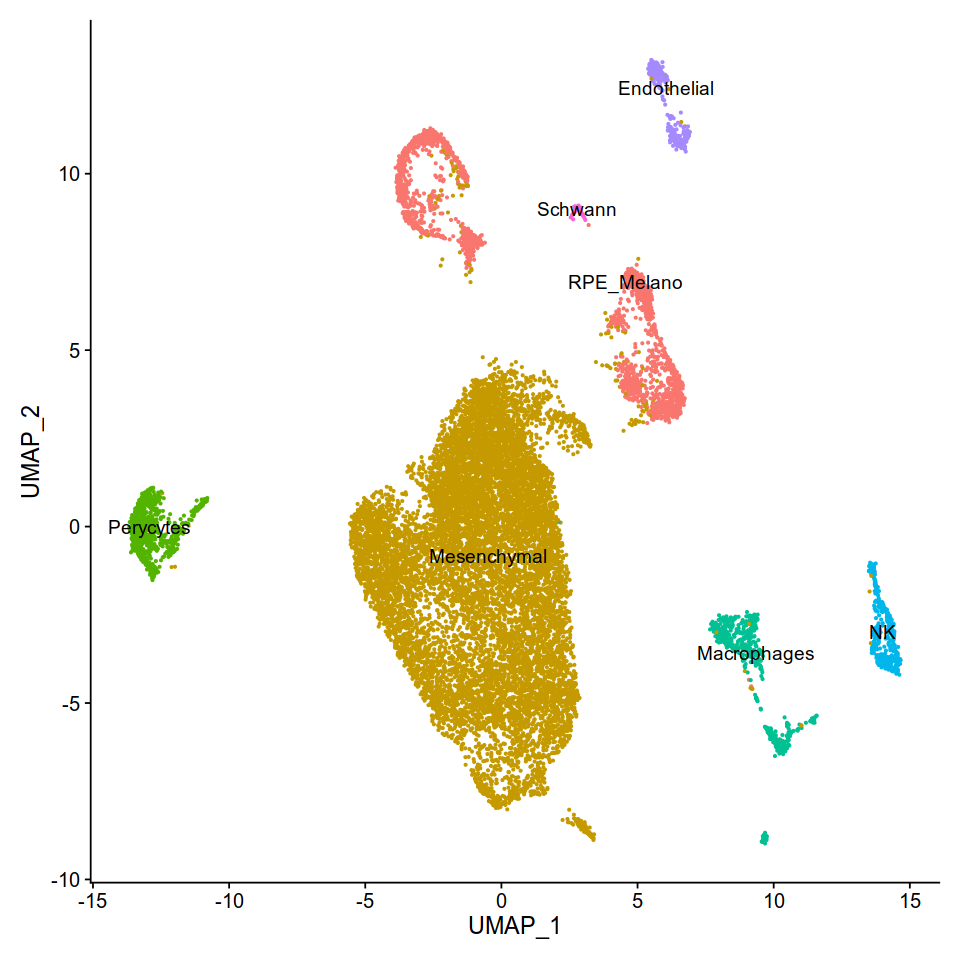

In [8]:
DimPlot(seurat, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [9]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
seurat.markers <- FindAllMarkers(seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
seurat.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster RPE_Melano

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster Mesenchymal

Calculating cluster Perycytes

Calculating cluster Macrophages

Calculating cluster NK

Calculating cluster Endothelial

Calculating cluster Schwann



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,4.858446,0.274,0.014,0.000000e+00,RPE_Melano,Gm45895
0.000000e+00,4.645625,0.281,0.012,0.000000e+00,RPE_Melano,Gm15222
3.123023e-90,3.487779,0.287,0.146,1.008268e-85,Mesenchymal,Myoc
1.642302e-225,3.479015,0.266,0.035,5.302171e-221,Mesenchymal,Prrx2
0.000000e+00,8.019786,0.602,0.012,0.000000e+00,Perycytes,2210407C18Rik
0.000000e+00,7.928502,0.313,0.002,0.000000e+00,Perycytes,Casq2
0.000000e+00,9.109208,0.401,0.002,0.000000e+00,Macrophages,Napsa
0.000000e+00,8.796889,0.699,0.048,0.000000e+00,Macrophages,H2-Eb1
0.000000e+00,10.797725,0.499,0.001,0.000000e+00,NK,Cd247


In [10]:
filter(seurat.markers, cluster %in% c('RPE_Melano') & avg_log2FC > 3 )

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Tyr,0,3.499304,0.812,0.185,0,RPE_Melano,Tyr
Met,0,3.294659,0.718,0.143,0,RPE_Melano,Met
Kcnj13,0,3.379494,0.869,0.313,0,RPE_Melano,Kcnj13
Tspan10,0,3.562109,0.673,0.124,0,RPE_Melano,Tspan10
Slc24a5,0,3.238567,0.803,0.264,0,RPE_Melano,Slc24a5
Mitf,0,3.045964,0.654,0.142,0,RPE_Melano,Mitf
Syngr1,0,3.151839,0.646,0.136,0,RPE_Melano,Syngr1
Car14,0,3.249476,0.762,0.272,0,RPE_Melano,Car14
Sox10,0,3.597841,0.512,0.059,0,RPE_Melano,Sox10


In [11]:
RPE_Melano<-filter(seurat.markers, cluster %in% c('RPE_Melano') & avg_log2FC > 2 )$gene

In [12]:
RPE_Melano1<-as_data_frame(RPE_Melano)

Warning message:
“`as_data_frame()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` (with slightly different semantics) to convert to a
  tibble, or `as.data.frame()` to convert to a data frame.”


In [13]:
write.csv(RPE_Melano1,file='RPE_Melano.csv', row.names=FALSE, col.names=FALSE)

Warning message in write.csv(RPE_Melano1, file = "RPE_Melano.csv", row.names = FALSE, :
“attempt to set 'col.names' ignored”


In [ ]:
saveRDS(seurat, file = "~/data//retina/notebook/h5ad/19_10_RPE_Melano_genes_clusters_together.rds")